In [2]:
# read the data into a Pandas DataFrame
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn import metrics

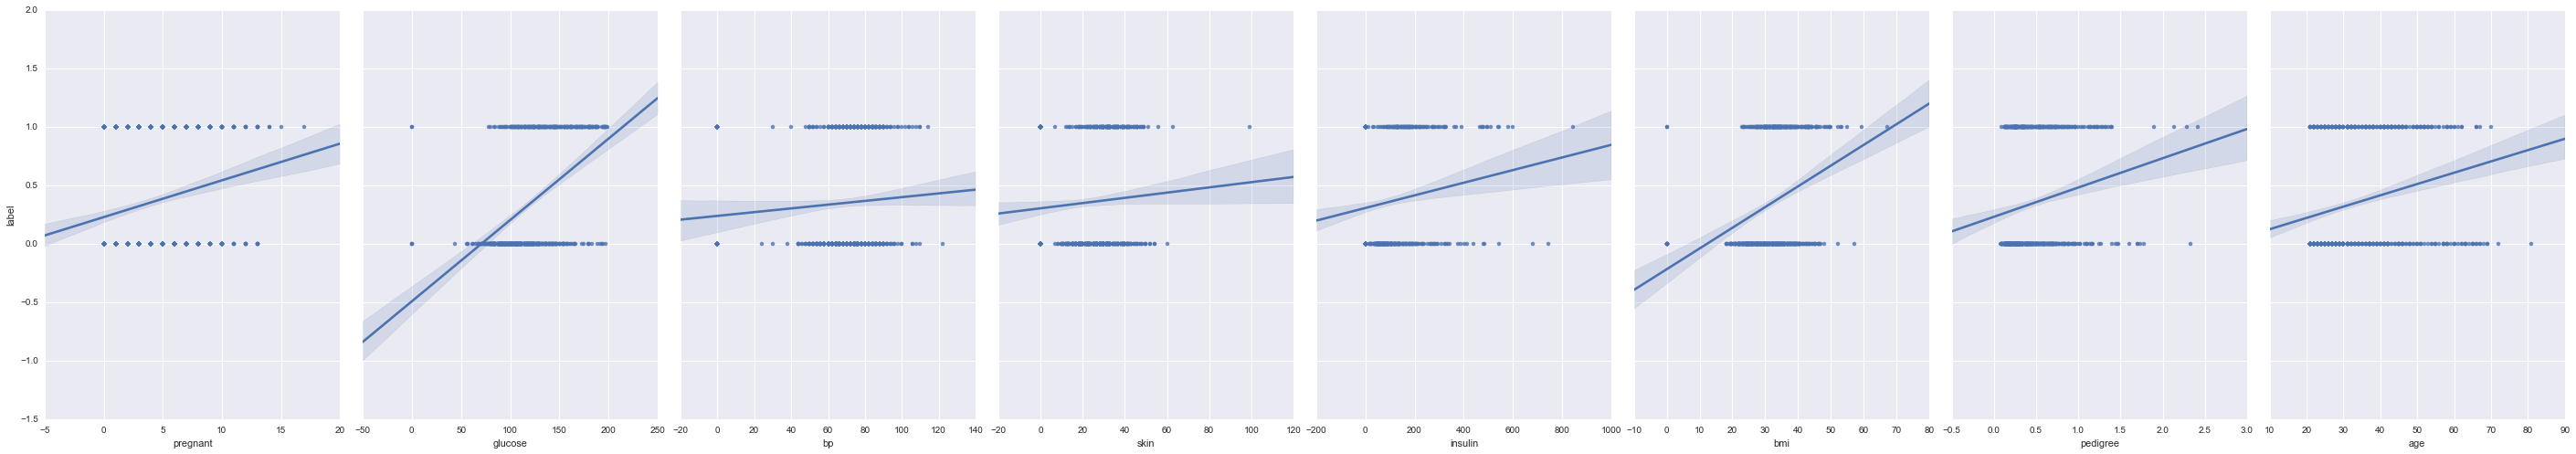

In [12]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X=pima[feature_cols]
y=pima.label
sns.pairplot(data=pima,x_vars=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age'],y_vars='label',size=7,aspect=0.7,kind="reg")

In [18]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
lr=LogisticRegression()
print lr
lr.fit(X_train,y_train)
#Classification accuracy: percentage of correct predictions
y_pred_class=lr.predict(X_test)
print metrics.accuracy_score(lr.predict(X_test),y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.692708333333


### Conclusion matrix:

Classification accuracy is the easiest classification metric to understand

But, it does not tell you the underlying distribution of response values

And, it does not tell you what "types" of errors your classifier is making

In [19]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


![mark](http://ofqh7nchg.bkt.clouddn.com/blog/20170107/221706069.png)

### Basic terminology

True Positives (TP): we correctly predicted that they do have diabetes

True Negatives (TN): we correctly predicted that they don't have diabetes

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

### Conclusion:

Confusion matrix gives you a more complete picture of how your classifier is performing

Also allows you to compute various classification metrics, and these metrics can guide your model selection
### Which metrics should you focus on?

Choice of metric depends on your business objective

Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)

Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

### Conclusion:

Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions

Threshold can be adjusted to increase sensitivity or specificity

Sensitivity and specificity have an inverse relationship
### ROC Curves and Area Under the Curve (AUC)

Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

Answer: Plot the ROC curve!

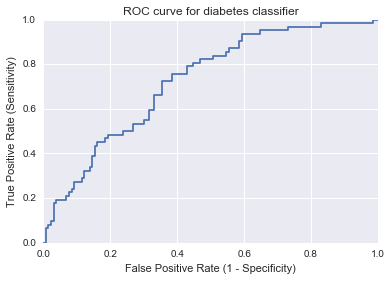

In [30]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
y_pred_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

更多参考：http://nbviewer.jupyter.org/github/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb